No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de classificação e regressão.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em Python puro e Numpy
- Utilizar o perceptron para regressão e classificação

# Sumário

[Introdução](#Introdução)
- [Regra de Aprendizado do Perceptron](#Regra-de-Aprendizado-do-Perceptron)
- [Pseudo-algoritmo do Perceptron](#Pseudo-algoritmo-do-Perceptron)

[Classificação](#Classificação)
- [Porta AND/OR](#Porta-AND/OR)
- [Exercício de Classificação](#Exerc%C3%ADcio-de-Classificação)

[Regressão](#Regressão)
- [Exercício de Regressão](#Exerc%C3%ADcio-de-Regressão)

[Referências](#Referências)

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

C:\Users\vinicius\Anaconda3\envs\mpdl\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. Inicialmente, o Perceptron foi projetado para ser um __classificador binário linear__ responsável por mapear uma ou mais entradas em uma saída desejada. Porém, também podemos utilizá-lo para resolver problemas de __regressão linear__. Ele foi projetado em 1957 por Frank Rosenblatt.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1,...,x_D$: representam os atributos dos seus dados com dimensionalidade $D$. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1,...,w_D)$. Em geral, o resultado é somado com um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: utilizada para mapear o resultado da junção aditiva em uma saída esperada. Mais detalhes abaixo.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$\widehat{y}_i = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x_i$: representam os atributos de uma amostra que servem de entrada para o Perceptron.
- $w_i$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: __função de ativação__. Quando a função de ativação é linear, ou seja, nenhuma transformação é aplicada no resultado da junção aditiva, o Perceptron atua como um __Regressor Linear__. Se precisamos efetuar uma __Classificação binária__, devemos utilizar a função _step_ (também conhecida como _função degrau_) para mapear a saída em um valor discreto (0 ou 1):

$$f = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

- $\widehat{y}$: representa a saída do Perceptron (o valor predito).

__Observações importantes__:

- O Perceptron não faz __Classificação Multiclasse__.
- __A atualização dos pesos é *online*, ou seja, efetuada amostra a amostra__ utilizando uma fórmula pré-definida que veremos na seção a seguir.

## Regra de Aprendizado do Perceptron

O Perceptron tem sua própria forma de aprendizado conforme definido no seu artigo original. Na verdade, a fórmula para atualização dos pesos e bias é bem simples:

$$w_i = w_i + \lambda(y_i - \widehat{y}_i)x_i$$
<br>
$$b_i = b_i + \lambda(y_i - \widehat{y}_i)$$

Onde $\lambda$ é a __taxa de aprendizagem__ (___learning rate___).

Repare que $y_i - \widehat{y}_i$ significa calcular a diferença entre o valor esperado ($y_i$) e o valor predito ($\widehat{y}_i$). Supondo que estamos fazendo __classificação binária__ de uma amostra $(x_i, y_i)$. Nesse caso, teremos duas possibilidades:
- __O valor esperado é $y_i = \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __igual__ a saída esperada. Nesse caso, __a diferença $y_i - \widehat{y}_i = 0$ e não haverá atualização de pesos__.
- __O valor esperado é $y_i \neq \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __diferente__ da saída esperada. Nesse caso, __a atualização dos pesos será dada pela diferença $y_i - \widehat{y}_i$__. Repare que:
    - quando essa diferença é __negativa__ (ou seja, $y_i = 0$ e $\widehat{y}_i = 1$), __os pesos tendem a diminuir__.
    - quando essa diferença é __positiva__ (ou seja, $y_i = 1$ e $\widehat{y}_i = 0$), __os pesos tendem a aumentar__.

## Pseudo-algoritmo do Perceptron

1. Inicialize os pesos $w$ e o bias $b$
2. Para cada amostra $(x_n, y_n)$ do nosso banco:
    1. Calcule $\widehat{y} = f(\sum_i^D{x_iw_i} + b)$, onde $f$ é a __função _step_ para classificação__ e __linear no caso da regressão__
    2. Calcule o $erro = y_n - \widehat{y}$
    3. Atualize os pesos $w_i = w_i + \lambda*erro*x_i$
    4. Atualize o bias $b_i = b_i + \lambda*erro$
3. Repita o passo 2 por N vezes ou até que alguma medida de custo para o $erro$ seja menor que um valor pré-determinado.
    
Repare, como dito lá em cima, que __a atualização dos pesos e bias é feito a cada amostra__, e não somente após ver todas as amostras do banco.

# Classificação

## Porta AND/OR

In [3]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([0, 0, 0, 1]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


### Python

step 0: 4.00
step 10: 0.00
step 20: 0.00
step 30: 0.00
step 40: 0.00
step 50: 0.00
step 60: 0.00
step 70: 0.00
step 80: 0.00
step 90: 0.00
step 100: 0.00
weights: [0.42 0.24]
bias: 0.55
y_proba: [ 1.15 -0.73 -1.54  1.91  1.39 -1.27  1.33 -0.76  1.35  1.25 -0.86  0.42
 -1.88 -1.09 -1.49 -1.7   1.64  1.85 -1.2   1.1  -2.03  1.21  1.6   1.27
 -1.24  1.23 -1.38  1.71  1.09  1.44  0.71  1.04 -1.61 -1.54 -1.72  0.98
  1.51  0.88 -0.85 -1.18 -2.03 -1.45 -1.48  1.53 -1.57  1.49  0.75  1.18
 -1.12  2.03  1.4  -1.59 -1.94 -0.88 -1.54  1.93  1.76  2.19  1.43  1.54
  1.77 -0.53  0.56  1.12  0.17 -1.6  -1.51  1.27 -1.52  1.55 -1.64 -1.13
  1.93 -1.56 -1.22  0.96 -1.25  0.78 -1.28  1.8  -2.07 -1.01 -1.31 -0.9
  2.32 -1.03  1.77 -1.18  1.14  1.34  0.96 -2.12 -1.67 -1.47 -1.36 -1.99
  1.11  1.58 -1.2  -1.01]
y_pred: [1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1
 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0

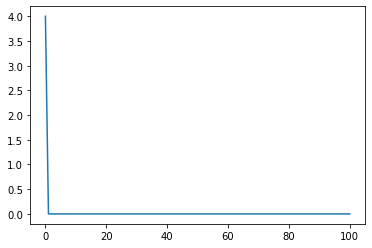

In [77]:
n_samples = x.shape[0]
n_features = x.shape[1]
n_epochs = 101
learning_rate = 0.01

# initial_weights = [[0.5, 0.5]]
# initial_biases = [[0.5,0.5]]

# Random initialization
# [-1,1)
initial_weights = [2*random()-1 for _ in range(n_features)]
initial_bias = 2*random()-1
# [0,1)
initial_weights = [random() for _ in range(n_features)]
initial_bias = random()

lst_bias = []
lst_weights = []
lst_y_pred = []
lst_cost = []
lst_y_proba = []

bias = initial_bias
weights = initial_weights[:]

step_function = lambda arg: 1 if (arg > 0) else 0

for epoch in range(n_epochs):
    cost = 0
    lst_weights.append([round(w,2) for w in weights])
    lst_bias.append(round(bias,2))
    
    for x_n, y_n in zip(x, y):
        arg_activation_fun = sum([x_i*w_i for x_i, w_i in zip(x_n, weights)]) + bias
        y_pred = step_function(arg_activation_fun)
        error = y_n - y_pred
        cost += error**2
        
        bias += learning_rate * error
        weights = [w_i + learning_rate * error * x_i for x_i, w_i in zip(x_n, weights)]

    if epoch % 10 ==0:
        print(f'step {epoch}: {cost:.2f}')

    # TODO: Check if lst_weights[-1] or weights
    y_proba = np.dot(x, np.array(lst_weights[-1])) + lst_bias[-1]
    lst_y_proba.append(np.round(y_proba, 2))
    y_pred = np.vectorize(step_function)(y_proba)
    lst_y_pred.append(y_pred)
    lst_cost.append(round(cost,2))

print(f"weights: {np.round(lst_weights[-1], 2)}")
print(f"bias: {lst_bias[-1]:.2f}")
print("y_proba:", np.round(y_proba, 2))
print("y_pred:", y_pred)
print("y:", y)
    
import pandas as pd
df = pd.DataFrame({
    "weights": lst_weights,
    "bias": lst_bias,
    "y_pred": lst_y_pred,
    "y_proba": lst_y_proba,
    "cost": lst_cost
})
df["cost"].plot();

In [66]:
df = pd.DataFrame({
    "y": y,
    "y_pred": y_pred,
    "y_proba": y_proba,
    "bias": round(bias,2)
})

print(f"weights: {np.round(lst_weights[-1], 2)}")
print(f"bias: {lst_bias[-1]:.2f}")

for feature in range(n_features):
    df[f"x{feature}"] = x[:,feature]
    df[f"w{feature}*x{feature}"] = lst_weights[-1][feature] * x[:,feature]
df    


weights: [0.19 0.4 ]
bias: -0.41


,y,y_pred,y_proba,bias,x0,w0*x0,x1,w1*x1
0,0,0,-0.41,-0.41,0,0.00,0,0.0
1,0,0,-0.01,-0.41,0,0.00,1,0.4
2,0,0,-0.22,-0.41,1,0.19,0,0.0
3,1,1,0.18,-0.41,1,0.19,1,0.4


### Numpy

## Exercício de Classificação

(100, 2) (100,)


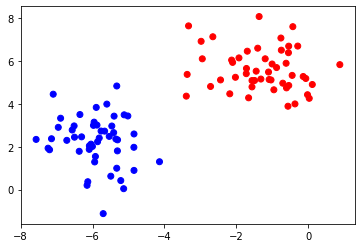

In [99]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr');

In [100]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

Cost: 5
Cost: 0
Cost: 0
Cost: 0
Cost: 0
Cost: 0
Cost: 0
Cost: 0
Cost: 0
Cost: 0
Cost: 0
weights: [0.45 0.49]
bias: -0.04
[1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1
 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0]


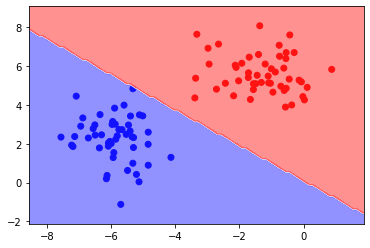

In [105]:
n_features = x.shape[1] 
learning_rate = 0.01
n_epochs = 101
w = [random() for _ in range(n_features)]
b = random()
lst_cost = []
for epoch in range(n_epochs):
    cost = 0
    for (x_n, y_n) in zip(x,y):
        y_pred = sum([x_i*w_i for (x_i, w_i) in zip(x_n, w)]) + b
        y_pred = 1 if (y_pred>0) else 0
        error = y_n - y_pred
        w = [w_i + learning_rate * error * x_i for (x_i, w_i) in zip(x_n, w)]
        b += learning_rate * error
        cost += error**2
        lst_cost.append(cost)
    
    if epoch % 10 == 0:
        print(f"Cost: {cost}")
y_proba = np.dot(x, np.array(w)) + b
y_pred = np.vectorize(step_function)(y_proba)

print(f"weights: {np.round(w, 2)}")
print(f"bias: {b:.2f}")
print(y_pred)

# plt.plot(y_pred, 'o');
plot_linear_classifier(x, y, w, b)

### Numpy

cost:9.00
cost:0.00
cost:0.00
cost:0.00
cost:0.00
cost:0.00
cost:0.00
cost:0.00
cost:0.00
cost:0.00
cost:0.00
weights: [0.49 0.32]
bias: 0.60
[1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1
 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0]


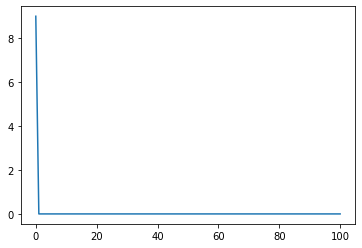

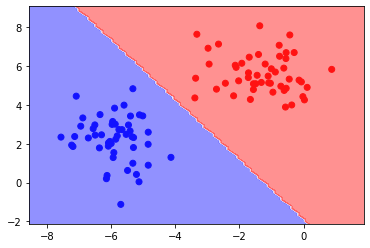

In [106]:
learning_rate = 0.01
n_epochs = 101

n_features = x.shape[1]
b = random()
w = np.random.random(n_features)
lst_cost = []

for epoch in range(n_epochs):
    cost = 0
    for (x_n, y_n) in zip(x,y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where( (y_pred>0), 1, 0)
        error = y_n - y_pred
        b += learning_rate * error
        w += learning_rate * np.dot(error, x_n)
        cost += error**2
    lst_cost.append(cost)
    if epoch % 10 == 0:
        print(f"cost:{cost:.2f}")

y_proba = np.dot(x, np.array(w)) + b
y_pred = np.vectorize(step_function)(y_proba)
print(f"weights: {np.round(w, 2)}")
print(f"bias: {b:.2f}")
print(y_pred)
plt.plot(lst_cost)
plt.show()
plot_linear_classifier(x, y, w, b)

# Regressão 

Para transformar o Perceptron em um __regressor linear__, só o que temos de fazer é __remover a função de ativação _step___, transformando-a em uma função de ativação linear.

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

In [107]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


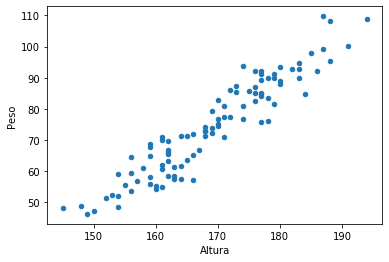

In [111]:
df.plot(kind="scatter", x="Altura", y="Peso");

In [113]:
x = df.Altura.values
y = df.Peso.values

# plt.figure()
# plt.scatter(x, y)
# plt.xlabel('Altura')
# plt.ylabel('Peso')

In [114]:
print(x.shape, y.shape)

(100,) (100,)


In [115]:
x = x.reshape(-1, 1)

print(x.shape, y.shape)

(100, 1) (100,)


### Python

__Exercício__: tentar estimar as learning_rates de **w** e __b__. Elas são diferentes por que nossos dados não estão na mesma escala!

In [127]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1
# coincidently same learning rates as the video
learning_rate_w = 1e-7  # [1e-5, 1e-10]
learning_rate_b = 0.01  # [1e-1, 1e-5]

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
#         y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w = [w_i + learning_rate_w*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate_b*error
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)  # 1.37
print('b: ', b)  # -157

step 0: 68539.02325847452
step 1000: 3692.45860524114
step 2000: 2808.3805876105303
step 3000: 2655.8203841681575
step 4000: 2630.2667233318166
step 5000: 2626.317449808562
step 6000: 2625.853104831661
step 7000: 2625.8683251231846
step 8000: 2625.911707775856
step 9000: 2625.9364280688733
step 10000: 2625.947949115147
w:  [1.3698630915846846]
b:  -157.89202923564702


### Numpy 

In [128]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

for step in range(10001):
    cost = 0
    for x_n, y_n in zip(x, y):
        # qual linha devemos remover para transformar o Perceptron num regressor?
        y_pred = np.dot(x_n, w) + b 
#         y_pred = np.where(y_pred > 0, 1, 0)
        error = y_n - y_pred
        w = w + 1e-7*np.dot(error, x_n)
        b = b + 1e-2*error
        cost += error**2
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 11624.73753901488
step 1000: 4237.4742141502675
step 2000: 2903.1361311736528
step 3000: 2671.99390279214
step 4000: 2632.899586333339
step 5000: 2626.690742343716
step 6000: 2625.880923414199
step 7000: 2625.8573115407135
step 8000: 2625.9030906689813
step 9000: 2625.9321083616164
step 10000: 2625.9460124698035
w:  [1.36983453]
b:  -157.88725790188926


### Numpy com Pré-processamento

In [138]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0


In [139]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [33.60164767]
b:  74.99636286981101


In [147]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1 

learning_rate = 0.001 # same estimative as the video

for step in range(1001):
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)
# minmax.inverse_transform(np.array([w]))

step 0: 531733.9494251077
step 100: 3157.3763892725674
step 200: 2624.2202586892477
step 300: 2611.5542931526224
step 400: 2611.2520035695857
step 500: 2611.2445807577337
step 600: 2611.244366566743
step 700: 2611.2443556309777
step 800: 2611.244354469879
step 900: 2611.2443543034074
step 1000: 2611.244354278059
w:  [33.60180844]
b:  74.9389642685754


## Exercício de Regressão

In [148]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


Text(0, 0.5, 'Final')

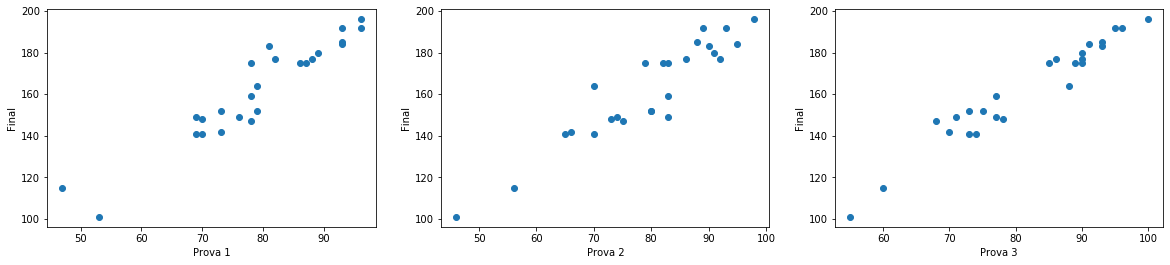

In [149]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [150]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

(25, 3) (25,)


In [151]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [152]:
reg = LinearRegression()
reg.fit(x, y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [ 8.72048636 14.1054877  26.26749487]
b:  150.65175754349872


### Python

In [159]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1

learning_rate = 0.01 # [1e-1, 1e-5]  # mesma learning rate

for step in range(1000): # [1000, 5000]  # 2000 passos
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i*w_i for x_i, w_i in zip(x_n, w)]) + b
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 502733.4905772822
step 200: 175.0291662398063
step 400: 148.58234671608372
step 600: 146.4297889891931
step 800: 146.18485532925354
w:  [8.800043953510238, 14.092586490638888, 26.29057195850006]
b:  150.70701404277796


### Numpy

In [160]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1       

learning_rate = 0.01

for step in range(1000): # <- tente estimar o número de passos
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error
        cost += error**2
    
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: 500441.350336848
step 200: 173.0222770461493
step 400: 148.32601118476205
step 600: 146.39709837769652
step 800: 146.1807191401668
w:  [ 8.79545459 14.09555584 26.29232281]
b:  150.70725749191348


# Referências

- [Artigo original do Perceptron](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf)